In [4]:
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.3 MB/s eta 0:00:00m eta 0:00:010:01:01


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
# VxH = ventas por hora
candidatos = pd.read_csv("candidatos.csv")
candidatos.head()

,Unnamed: 0,Id,Apellido,Nombre,Propio,Padre,Madre,PIngFam,IngFam,Hijos,...,Conciente,Espiritual,Impulsivo,Desordenado,Temeroso,Vago,Apego,Empatia,Compasivo,VxH
0,2001.0,2001.0,IEEDT,HXNNE,P,S,U,0.635436,24067.799200,3.0,...,0.668210,0.071264,0.432082,0.629010,0.637187,0.414266,0.993104,0.635439,0.391713,0.668056
1,2002.0,2002.0,QBGGM,EFSDQ,S,S,S,0.040481,888.691287,0.0,...,0.012803,0.883487,0.635627,0.546845,0.161276,0.978667,0.755853,0.726491,0.402689,0.577299
2,2003.0,2003.0,HYTBY,OXHIO,P,P,P,0.833301,9538.750972,3.0,...,0.686292,0.788468,0.759097,0.367503,0.932920,0.730979,0.737602,0.676378,0.532649,0.664926
3,2004.0,2004.0,YGBVR,NROUL,P,P,S,0.056655,36689.774460,0.0,...,0.381746,0.494362,0.535878,0.875206,0.439117,0.036786,0.450734,0.783467,0.394388,0.497553
4,2005.0,2005.0,GBKJI,XBTPE,U,U,S,0.878438,15619.105760,0.0,...,0.175591,0.479551,0.532370,0.293475,0.347215,0.608372,0.547918,0.730971,0.615270,0.678367


In [3]:
# VxH = ventas por hora
empleados = pd.read_csv("empleados.csv")
empleados.head()

,Unnamed: 0,Id,Apellido,Nombre,Propio,Padre,Madre,PIngFam,IngFam,Hijos,...,Conciente,Espiritual,Impulsivo,Desordenado,Temeroso,Vago,Apego,Empatia,Compasivo,VxH
0,1,1,WAFIB,IVBAG,P,U,P,0.157801,3327.694337,1,...,0.193967,0.199760,0.886397,0.293124,0.911440,0.509821,0.943348,0.699691,0.719768,0.706507
1,2,2,TFLUT,OBEYM,P,U,S,0.418146,6224.254085,0,...,0.818907,0.417641,0.244248,0.367736,0.054235,0.076588,0.681771,0.613223,0.695288,0.801135
2,3,3,FCACU,UREDL,S,S,S,0.900064,26541.188090,4,...,0.900222,0.267379,0.298552,0.106619,0.908355,0.218304,0.753459,0.893524,0.537843,0.906939
3,4,4,XCQTN,LRHOD,P,S,S,0.171808,18727.201640,0,...,0.181652,0.734043,0.768234,0.285648,0.613740,0.862424,0.208604,0.423194,0.793449,0.591296
4,5,5,BHEFK,ILQNP,U,S,P,0.807108,24114.962470,0,...,0.262053,0.632243,0.628504,0.257601,0.049678,0.622631,0.962792,0.419418,0.463255,0.605940


In [4]:
empleados.columns

Index(['Unnamed: 0', 'Id', 'Apellido', 'Nombre', 'Propio', 'Padre', 'Madre',
       'PIngFam', 'IngFam', 'Hijos', 'Exitable', 'Extravagante', 'Pesimista',
       'Timido', 'Sentimental', 'Dependiente', 'Responsable', 'Capaz',
       'Sociable', 'Servicial', 'Etico', 'Conciente', 'Espiritual',
       'Impulsivo', 'Desordenado', 'Temeroso', 'Vago', 'Apego', 'Empatia',
       'Compasivo', 'VxH'],
      dtype='object')

In [5]:
print(empleados.shape)
#print(data.head(10))
empleados.describe().T

(2000, 31)


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2000.0,1000.500000,577.494589,1.000000,500.750000,1000.500000,1500.250000,2000.000000
Id,2000.0,1000.500000,577.494589,1.000000,500.750000,1000.500000,1500.250000,2000.000000
PIngFam,2000.0,0.505139,0.285548,0.000811,0.262371,0.519269,0.748678,0.999894
IngFam,2000.0,25131.676861,14474.668465,17.715747,12370.696550,25425.138245,37677.493355,49999.235740
Hijos,2000.0,0.712500,1.180059,0.000000,0.000000,0.000000,1.000000,4.000000
Exitable,2000.0,0.518407,0.287852,0.000117,0.271435,0.519690,0.775260,0.999546
Extravagante,2000.0,0.501404,0.285681,0.000434,0.260156,0.491889,0.754485,0.999957
Pesimista,2000.0,0.497537,0.291854,0.000634,0.230807,0.504420,0.747972,0.999990
Timido,2000.0,0.498040,0.291858,0.000034,0.247030,0.491026,0.755231,0.998728
Sentimental,2000.0,0.500353,0.290692,0.000128,0.241679,0.499710,0.752947,0.999975


In [6]:
empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2000 non-null   int64  
 1   Id            2000 non-null   int64  
 2   Apellido      2000 non-null   object 
 3   Nombre        2000 non-null   object 
 4   Propio        2000 non-null   object 
 5   Padre         2000 non-null   object 
 6   Madre         2000 non-null   object 
 7   PIngFam       2000 non-null   float64
 8   IngFam        2000 non-null   float64
 9   Hijos         2000 non-null   int64  
 10  Exitable      2000 non-null   float64
 11  Extravagante  2000 non-null   float64
 12  Pesimista     2000 non-null   float64
 13  Timido        2000 non-null   float64
 14  Sentimental   2000 non-null   float64
 15  Dependiente   2000 non-null   float64
 16  Responsable   2000 non-null   float64
 17  Capaz         2000 non-null   float64
 18  Sociable      2000 non-null 

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'PIngFam'}>,
        <AxesSubplot:title={'center':'IngFam'}>,
        <AxesSubplot:title={'center':'Hijos'}>],
       [<AxesSubplot:title={'center':'Exitable'}>,
        <AxesSubplot:title={'center':'Extravagante'}>,
        <AxesSubplot:title={'center':'Pesimista'}>,
        <AxesSubplot:title={'center':'Timido'}>,
        <AxesSubplot:title={'center':'Sentimental'}>],
       [<AxesSubplot:title={'center':'Dependiente'}>,
        <AxesSubplot:title={'center':'Responsable'}>,
        <AxesSubplot:title={'center':'Capaz'}>,
        <AxesSubplot:title={'center':'Sociable'}>,
        <AxesSubplot:title={'center':'Servicial'}>],
       [<AxesSubplot:title={'center':'Etico'}>,
        <AxesSubplot:title={'center':'Conciente'}>,
        <AxesSubplot:title={'center':'Espiritual'}>,
        <AxesSubplot:title={'center':'Impulsivo'}>,
        <AxesSubplot:title=

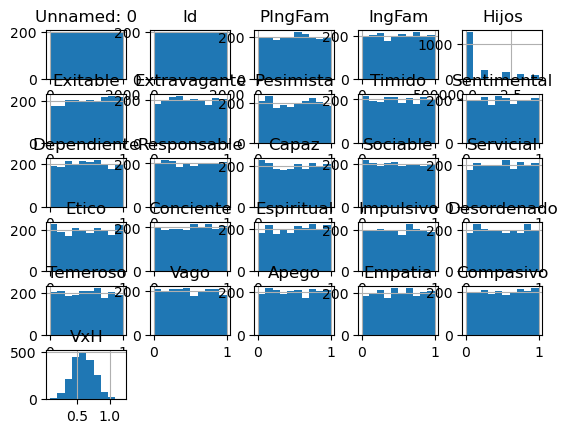

In [7]:
empleados.hist()

VxH
0     976
1    1024
dtype: int64


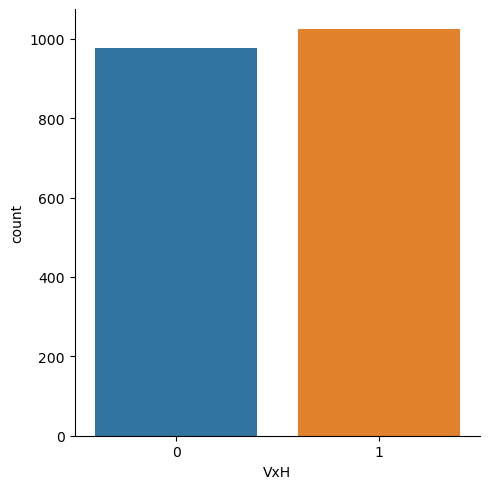

In [22]:
data_ok = empleados.copy()

# Si cumple con el umbral minimo o no
data_ok['VxH'] = np.where(data_ok['VxH'] > 0.6, 0, 1)

# Otros datos
data_ok['PIngFam'] = np.where(empleados['PIngFam'] < empleados['PIngFam'].mean(), 0, 1)
data_ok['IngFam'] = np.where(empleados['IngFam'] < empleados['IngFam'].mean(), 0, 1)
data_ok['Hijos'] = np.where(empleados['Hijos'] < empleados['Hijos'].mean(), 0, 1)
data_ok['Exitable'] = np.where(empleados['Exitable'] < empleados['Exitable'].mean(), 0, 1)
data_ok['Extravagante'] = np.where(empleados['Extravagante'] < empleados['Extravagante'].mean(), 0, 1)
data_ok['Pesimista'] = np.where(empleados['Pesimista'] < empleados['Pesimista'].mean(), 0, 1)
data_ok['Timido'] = np.where(empleados['Timido'] < empleados['Timido'].mean(), 0, 1)
data_ok['Sentimental'] = np.where(empleados['Sentimental'] < empleados['Sentimental'].mean(), 0, 1)
data_ok['Dependiente'] = np.where(empleados['Dependiente'] < empleados['Dependiente'].mean(), 0, 1)
data_ok['Capaz'] = np.where(empleados['Capaz'] < empleados['Capaz'].mean(), 0, 1)
data_ok['Sociable'] = np.where(empleados['Sociable'] < empleados['Sociable'].mean(), 0, 1)
data_ok['Servicial'] = np.where(empleados['Servicial'] < empleados['Servicial'].mean(), 0, 1)
data_ok['Etico'] = np.where(empleados['Etico'] < empleados['Etico'].mean(), 0, 1)
data_ok['Conciente'] = np.where(empleados['Conciente'] < empleados['Conciente'].mean(), 0, 1)
data_ok['Espiritual'] = np.where(empleados['Espiritual'] < empleados['Espiritual'].mean(), 0, 1)
data_ok['Impulsivo'] = np.where(empleados['Impulsivo'] < empleados['Impulsivo'].mean(), 0, 1)
data_ok['Desordenado'] = np.where(empleados['Desordenado'] < empleados['Desordenado'].mean(), 0, 1)
data_ok['Temeroso'] = np.where(empleados['Temeroso'] < empleados['Temeroso'].mean(), 0, 1)
data_ok['Vago'] = np.where(empleados['Vago'] < empleados['Vago'].mean(), 0, 1)
data_ok['Apego'] = np.where(empleados['Apego'] < empleados['Apego'].mean(), 0, 1)
data_ok['Empatia'] = np.where(empleados['Empatia'] < empleados['Empatia'].mean(), 0, 1)
data_ok['Compasivo'] = np.where(empleados['Compasivo'] < empleados['Compasivo'].mean(), 0, 1)
data_ok['Responsable'] = np.where(empleados['Responsable'] < empleados['Responsable'].mean(), 0, 1)


# miramos si hay balance de clase a predecir
sns.catplot(x='VxH', data = data_ok, kind = 'count')
print(data_ok.groupby('VxH').size())

In [23]:
columnas_off = ['Unnamed: 0','Id','Unnamed: 0','Apellido','Nombre','Propio','Padre','Madre']
data_ok.drop(columnas_off, axis = 1, inplace = True)
data_ok.head()

,PIngFam,IngFam,Hijos,Exitable,Extravagante,Pesimista,Timido,Sentimental,Dependiente,Responsable,...,Conciente,Espiritual,Impulsivo,Desordenado,Temeroso,Vago,Apego,Empatia,Compasivo,VxH
0,0,0,1,1,1,0,0,0,0,1,...,0,0,1,0,1,1,1,1,1,0
1,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,1,0
2,1,1,1,1,0,0,0,1,1,0,...,1,0,0,0,1,0,1,1,1,0
3,0,0,0,0,1,0,0,0,1,0,...,0,1,1,0,1,1,0,0,1,1
4,1,0,0,0,0,0,0,0,1,1,...,0,1,1,0,0,1,1,0,0,0


In [26]:
# 30% de testeo
test_size = 0.3

# Calcula el número de filas que se utilizarán como conjunto de prueba
num_test_samples = int(len(data_ok) * test_size)

# Divide los datos en conjuntos de entrenamiento y prueba
train_data = data_ok[:-num_test_samples]
test_data = data_ok[-num_test_samples:]
print(train_data.shape)
print(test_data.shape)

(1400, 24)
(600, 24)


Divido el conjunto de prueba en 2
- uno con los que cumplen el requisito de contrato (VxH > 0.6)
- uno con los que no cumple el requisito de contrato (VxH > 0.6)

In [27]:
# Divido el conjunto de prueba en
Contratado_si = data_ok.loc[data_ok['VxH']==1]   # nos quedamos sólo con los registros que corresponden a diabéticos
Contratado_si.drop(['VxH'], inplace=True, axis=1)
print(Contratado_si.shape)
Contratado_si

(1024, 23)


/tmp/ipykernel_145462/284969062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Contratado_si.drop(['VxH'], inplace=True, axis=1)


,PIngFam,IngFam,Hijos,Exitable,Extravagante,Pesimista,Timido,Sentimental,Dependiente,Responsable,...,Etico,Conciente,Espiritual,Impulsivo,Desordenado,Temeroso,Vago,Apego,Empatia,Compasivo
3,0,0,0,0,1,0,0,0,1,0,...,1,0,1,1,0,1,1,0,0,1
6,1,0,0,1,1,0,0,1,0,0,...,1,1,0,0,1,0,1,1,0,1
10,1,1,0,0,1,0,1,0,1,1,...,0,1,0,1,0,0,0,1,0,0
12,0,1,0,0,1,0,1,0,1,1,...,0,1,1,0,0,0,0,1,0,0
14,1,1,1,1,1,1,0,0,0,0,...,1,1,1,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,1,0,0,1,1,0,1,0,1,1,...,0,1,1,0,0,1,0,0,1,0
1994,0,0,0,1,0,1,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
1995,1,1,1,1,1,0,1,0,1,1,...,0,0,1,1,0,0,1,0,1,1
1997,1,0,0,0,0,1,0,1,1,1,...,1,0,1,0,0,0,0,0,1,1


In [28]:
Contratado_no = data_ok.loc[data_ok['VxH']==0]   # nos quedamos sólo con los registros que corresponden a diabéticos
Contratado_no.drop(['VxH'], inplace=True, axis=1)
print(Contratado_no.shape)
Contratado_no

(976, 23)


/tmp/ipykernel_145462/1818251568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Contratado_no.drop(['VxH'], inplace=True, axis=1)


,PIngFam,IngFam,Hijos,Exitable,Extravagante,Pesimista,Timido,Sentimental,Dependiente,Responsable,...,Etico,Conciente,Espiritual,Impulsivo,Desordenado,Temeroso,Vago,Apego,Empatia,Compasivo
0,0,0,1,1,1,0,0,0,0,1,...,0,0,0,1,0,1,1,1,1,1
1,0,0,0,1,0,0,0,0,0,1,...,1,1,0,0,0,0,0,1,1,1
2,1,1,1,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,1,1,1
4,1,0,0,0,0,0,0,0,1,1,...,1,0,1,1,0,0,1,1,0,0
5,1,1,0,0,1,0,1,0,1,1,...,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,0,0,1,1,1,0,0,1,0,0,...,1,1,0,0,0,0,0,1,1,0
1991,0,1,1,1,1,0,0,1,1,1,...,1,0,0,0,1,1,0,1,1,0
1992,0,1,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0
1996,1,1,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,0


In [37]:
frequent_items_Si = apriori(Contratado_si, use_colnames=True, min_support=0.1)

print(frequent_items_Si.shape)
frequent_items_Si

(1891, 2)


/home/simon/Descargas/yes/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.532227,(PIngFam)
1,0.497070,(IngFam)
2,0.186523,(Hijos)
3,0.493164,(Exitable)
4,0.506836,(Extravagante)
...,...,...
1886,0.100586,"(Vago, Espiritual, Desordenado, Etico)"
1887,0.104492,"(Espiritual, Empatia, Desordenado, Etico)"
1888,0.104492,"(Espiritual, Conciente, Temeroso, Desordenado)"
1889,0.104492,"(Conciente, Empatia, Temeroso, Espiritual)"


In [39]:
reglas = association_rules(frequent_items_Si, metric = 'lift')
#print(reglas.head())
print(reglas.shape)
print('TODAS LAS ASOCIACIONES ENCONTRADAS')
reglas.sort_values(['support'], ascending=False).reset_index(drop=True)

(11228, 10)
TODAS LAS ASOCIACIONES ENCONTRADAS


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Espiritual),(Timido),0.607422,0.570312,0.347656,0.572347,1.003568,0.001236,1.004758,0.009056
1,(Timido),(Espiritual),0.570312,0.607422,0.347656,0.609589,1.003568,0.001236,1.005551,0.008274
2,(Espiritual),(Temeroso),0.607422,0.587891,0.346680,0.570740,0.970826,-0.010418,0.960045,-0.071104
3,(Temeroso),(Espiritual),0.587891,0.607422,0.346680,0.589701,0.970826,-0.010418,0.956810,-0.067963
4,(Etico),(Espiritual),0.568359,0.607422,0.340820,0.599656,0.987216,-0.004414,0.980603,-0.029128
...,...,...,...,...,...,...,...,...,...,...
11223,"(Conciente, Etico, Pesimista)",(Compasivo),0.180664,0.545898,0.100586,0.556757,1.019891,0.001962,1.024497,0.023803
11224,"(Etico, Pesimista, Compasivo)",(Conciente),0.177734,0.558594,0.100586,0.565934,1.013141,0.001305,1.016911,0.015774
11225,"(Conciente, Compasivo)","(Etico, Pesimista)",0.314453,0.328125,0.100586,0.319876,0.974860,-0.002594,0.987871,-0.036254
11226,"(Conciente, Pesimista)","(Etico, Compasivo)",0.317383,0.317383,0.100586,0.316923,0.998551,-0.000146,0.999327,-0.002121


In [ ]:
# Evaluamos nuestras reglas enel conjunto de testeo

In [33]:
frequent_items_no = apriori(Contratado_no, use_colnames=True, min_support=0.1)

print(frequent_items_no.shape)
frequent_items_no

(1581, 2)


/home/simon/Descargas/yes/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.489754,(PIngFam)
1,0.517418,(IngFam)
2,0.490779,(Hijos)
3,0.509221,(Exitable)
4,0.478484,(Extravagante)
...,...,...
1576,0.102459,"(Temeroso, Apego, Compasivo)"
1577,0.112705,"(Vago, Empatia, Apego)"
1578,0.105533,"(Vago, Apego, Compasivo)"
1579,0.121926,"(Empatia, Apego, Compasivo)"


In [36]:
reglas = association_rules(frequent_items_no, metric = 'lift')
#print(reglas.head())
print(reglas.shape)
print('TODAS LAS ASOCIACIONES ENCONTRADAS')
reglas.sort_values(['support'], ascending=False).reset_index(drop=True)

(8344, 10)
TODAS LAS ASOCIACIONES ENCONTRADAS


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Impulsivo),(Capaz),0.559426,0.539959,0.312500,0.558608,1.034538,0.010433,1.042251,0.075776
1,(Capaz),(Impulsivo),0.539959,0.559426,0.312500,0.578748,1.034538,0.010433,1.045867,0.072569
2,(Capaz),(Sociable),0.539959,0.544057,0.307377,0.569260,1.046323,0.013608,1.058510,0.096236
3,(Sociable),(Capaz),0.544057,0.539959,0.307377,0.564972,1.046323,0.013608,1.057497,0.097101
4,(IngFam),(Impulsivo),0.517418,0.559426,0.302254,0.584158,1.044210,0.012797,1.059475,0.087733
...,...,...,...,...,...,...,...,...,...,...
8339,"(Timido, Hijos)",(Exitable),0.211066,0.509221,0.100410,0.475728,0.934227,-0.007069,0.936115,-0.081928
8340,(Desordenado),"(Vago, Espiritual)",0.489754,0.187500,0.100410,0.205021,1.093445,0.008581,1.022039,0.167486
8341,(Espiritual),"(Vago, Desordenado)",0.409836,0.225410,0.100410,0.245000,1.086909,0.008029,1.025947,0.135488
8342,(Pesimista),"(Conciente, Exitable)",0.445697,0.226434,0.100410,0.225287,0.994934,-0.000511,0.998519,-0.009102
